In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Compare the two Beamlet algorithms

In [2]:
pth = 'hst_even_150beams_OF1.7_1mm_256pix'
old = np.abs(fits.getdata(pth+'_abs.fits')*np.exp(1j*fits.getdata(pth+'_angle.fits')))**2
old /= np.sum(old)
new = np.abs(fits.getdata('newmethod_'+pth+'_abs.fits')*np.exp(1j*fits.getdata('newmethod_'+pth+'_angle.fits')))**2
new /= np.sum(new)

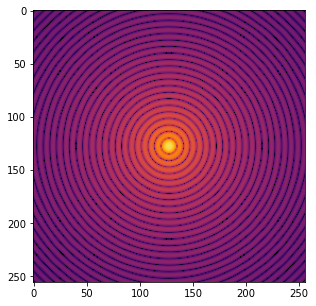

In [3]:
# Load the Airy function
from poppy.misc import airy_2d
pixscal = 1e-3/57.6 * 206265 / 256
analytical = airy_2d(diameter=2.4,wavelength=1e-6,shape=[256,256],pixelscale=pixscal)
analytical /= np.sum(analytical)

plt.figure(figsize=[5,5])
plt.imshow(np.log10(analytical),cmap='inferno',vmin=-10,vmax=-1)
plt.show()

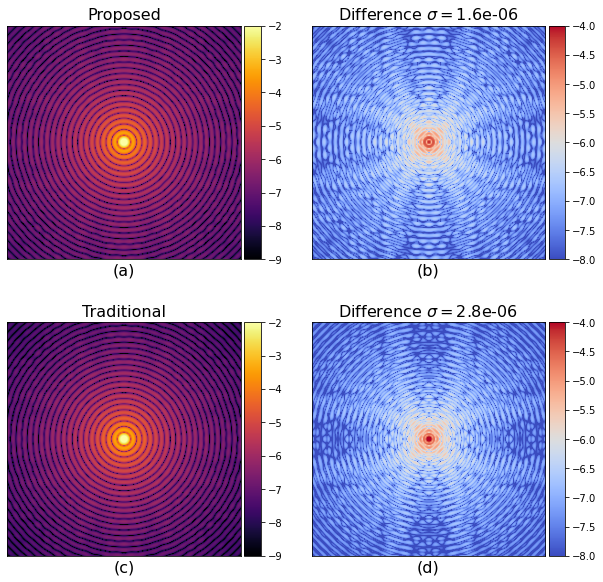

In [68]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import chisquare

def chi2(a,b):
    return np.sum((a-b)**2 / b)

fig,axs = plt.subplots(ncols=2,nrows=2,figsize=[10,10])
fsize = 16
titles = ['Proposed','Difference','Traditional','Difference']
cmaps = ['inferno','coolwarm','inferno','coolwarm']
xlabels = ['(a)','(b)','(c)','(d)']
vmins = [-9,-8,-9,-8]
vmaxs = [-2,-4,-2,-4]
diff_new = (new-analytical)
diff_old = (old-analytical)
datasets = [np.log10(new),np.log10(np.abs(diff_new)),np.log10(old),np.log10(np.abs(diff_old)),]
for ax,data,title,cmap,vmin,vmax,xlabel in zip(axs.ravel(),datasets,titles,cmaps,vmins,vmaxs,xlabels):
    im = ax.imshow(data,cmap=cmap,vmin=vmin,vmax=vmax)
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="7%", pad=0.05)
    fig.colorbar(im,cax=cax)
    ax.set_yticks([])
    ax.set_yticklabels('')
    ax.set_xticks([])
    ax.set_xticklabels('')
    ax.set_title(title,fontsize=fsize)
    ax.set_xlabel(xlabel,fontsize=fsize)

axs[0,1].set_title(title+r' $\sigma = $'+f'{np.std(diff_new):.2}',fontsize=fsize)
axs[1,1].set_title(title+r' $\sigma = $'+f'{np.std(diff_old):.2}',fontsize=fsize)
fig.savefig('compare_wold.png')

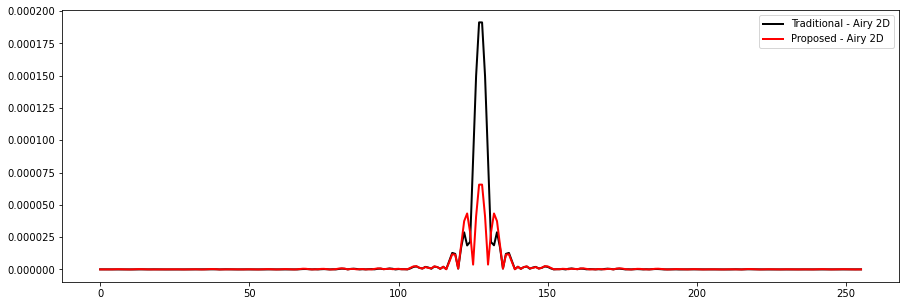

In [48]:

plt.figure(figsize=[15,5])
plt.plot(np.abs(old[128,:]-analytical[128,:]),label='Traditional - Airy 2D',linewidth=2,color='black')
plt.plot(np.abs(new[128,:]-analytical[128,:]),label='Proposed - Airy 2D',linewidth=2,color='red')
# plt.yscale('log')
plt.legend()
plt.show()

8.063899114548252e-12
2.4914674346610138e-12
